In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import time

%matplotlib inline

In [2]:
# Crawl the meta data from NeurIPS official homepage
# Set up a browser to crawl from dynamic web pages 
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By

chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)

/var/folders/m2/2_gy8ysx1vn2gzct12cnn4wh0000gn/T/ipykernel_42595/1205039970.py:11: DeprecationWarning: use options instead of chrome_options
  wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)


In [8]:
# Load URL for all NeurIPS 2020 accepted papers.
wd.get("https://nips.cc/Conferences/2021/AcceptedPapersInitial") #FIXME

meta_list = [] 
wait_time = 0.5
max_try = 1000

In [14]:
title_list = []

titles = wd.find_elements_by_class_name("maincardBody")

for title in titles:
    title_list.append(title.text)
# for i in range(3, len(titles)):
#   title_name = titles[i].text.split("\n")[0]
#   title_list.append(title_name)

print("The number of total accepted paper titles : ", len(title_list))


/var/folders/m2/2_gy8ysx1vn2gzct12cnn4wh0000gn/T/ipykernel_42595/948304819.py:3: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  titles = wd.find_elements_by_class_name("maincardBody")


The number of total accepted paper titles :  2334


In [15]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from collections import Counter

print(stopwords.words('english'))

stopwords_deep_learning = ['learning', 'network', 'neural', 'networks', 'deep', 'via', 'using', 'convolutional', 'single']

keyword_list = []

for i, title in enumerate(title_list):
  
  print(i, "th paper's title : ", title)
    
  word_list = title.split(" ")
  word_list = list(set(word_list))
    
  word_list_cleaned = [] 
  for word in word_list: 
    word = word.lower()
    if word not in stopwords.words('english') and word not in stopwords_deep_learning: #remove stopwords
          word_list_cleaned.append(word)  
    
  for k in range(len(word_list_cleaned)):
    keyword_list.append(word_list_cleaned[k])
  
keyword_counter = Counter(keyword_list)
print(keyword_counter)  

print('{} different keywords before merging'.format(len(keyword_counter)))

# Merge duplicates: CNNs and CNN
duplicates = []
for k in keyword_counter:
    if k+'s' in keyword_counter:
        duplicates.append(k)
for k in duplicates:
    keyword_counter[k] += keyword_counter[k+'s']
    del keyword_counter[k+'s']
print('{} different keywords after merging'.format(len(keyword_counter)))
print(keyword_counter)  

print("")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dongwookim/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

362 th paper's title :  The Semi-Random Satisfaction of Voting Axioms
363 th paper's title :  TOHAN: A One-step Approach towards Few-shot Hypothesis Adaptation
364 th paper's title :  Object-aware Contrastive Learning for Debiased Scene Representation
365 th paper's title :  Learning-to-learn non-convex piecewise-Lipschitz functions
366 th paper's title :  Causal Inference for Event Pairs in Multivariate Point Processes
367 th paper's title :  Tractable Regularization of Probabilistic Circuits
368 th paper's title :  Stochastic Optimization of Areas Under Precision-Recall Curves with Provable Convergence
369 th paper's title :  SegFormer: Simple and Efficient Design for Semantic Segmentation with Transformers
370 th paper's title :  Your head is there to move you around: Goal-driven models of the primate dorsal pathway
371 th paper's title :  Predicting What You Already Know Helps: Provable Self-Supervised Learning
372 th paper's title :  On Provable Benefits of Depth in Training Graph

649 th paper's title :  Fine-grained Generalization Analysis of Inductive Matrix Completion
650 th paper's title :  Predicting Event Memorability from Contextual Visual Semantics
651 th paper's title :  Towards a Theoretical Framework of Out-of-Distribution Generalization
652 th paper's title :  Understanding the Under-Coverage Bias in Uncertainty Estimation
653 th paper's title :  Reverse engineering learned optimizers reveals known and novel mechanisms
654 th paper's title :  Flow Network based Generative Models for Non-Iterative Diverse Candidate Generation
655 th paper's title :  UniDoc: Unified Pretraining Framework for Document Understanding
656 th paper's title :  MADE: Exploration via Maximizing Deviation from Explored Regions
657 th paper's title :  Remember What You Want to Forget: Algorithms for Machine Unlearning
658 th paper's title :  Unadversarial Examples: Designing Objects for Robust Vision
659 th paper's title :  On Interaction Between Augmentations and Corruptions in

951 th paper's title :  Linear Convergence of Gradient Methods for Estimating Structured Transition Matrices in High-dimensional Vector Autoregressive Models
952 th paper's title :  A Mathematical Framework for Quantifying Transferability in Multi-source Transfer Learning
953 th paper's title :  Towards a Unified Game-Theoretic View of Adversarial Perturbations and Robustness
954 th paper's title :  Non-approximate Inference for Collective Graphical Models on Path Graphs via Discrete Difference of Convex Algorithm
955 th paper's title :  BlendGAN: Implicitly GAN Blending for Arbitrary Stylized Face Generation
956 th paper's title :  Learnability of Linear Thresholds from Label Proportions
957 th paper's title :  Shape from Blur: Recovering Textured 3D Shape and Motion of Fast Moving Objects
958 th paper's title :  Latent Equilibrium: A unified learning theory for arbitrarily fast computation with arbitrarily slow neurons
959 th paper's title :  PolarStream: Streaming Object Detection a

1225 th paper's title :  Nearly Minimax Optimal Reinforcement Learning for Discounted MDPs
1226 th paper's title :  Unlabeled Principal Component Analysis
1227 th paper's title :  Lip to Speech Synthesis with Visual Context Attentional GAN
1228 th paper's title :  Interventional Sum-Product Networks: Causal Inference with Tractable Probabilistic Models
1229 th paper's title :  Towards Sample-Optimal Compressive Phase Retrieval with Sparse and Generative Priors
1230 th paper's title :  Integrating Tree Path in Transformer for Code Representation
1231 th paper's title :  Overcoming Catastrophic Forgetting in Incremental Few-Shot Learning by Finding Flat Minima
1232 th paper's title :  Semialgebraic Representation of Monotone Deep Equilibrium Models and Applications to Certification
1233 th paper's title :  A Constant Approximation Algorithm for Sequential Random-Order No-Substitution k-Median Clustering
1234 th paper's title :  Preserved central model for faster bidirectional compression

1534 th paper's title :  Fair Sortition Made Transparent
1535 th paper's title :  Pipeline Combinators for Gradual AutoML
1536 th paper's title :  Differentially Private n-gram Extraction
1537 th paper's title :  Multimodal Few-Shot Learning with Frozen Language Models
1538 th paper's title :  Functional Variational Inference based on Stochastic Process Generators
1539 th paper's title :  Representation Learning for Event-based Visuomotor Policies
1540 th paper's title :  Robust Allocations with Diversity Constraints
1541 th paper's title :  Conformal Bayesian Computation
1542 th paper's title :  Shared Independent Component Analysis for Multi-Subject Neuroimaging
1543 th paper's title :  OpenMatch: Open-Set Semi-supervised Learning with Open-set Consistency Regularization
1544 th paper's title :  Locally private online change point detection
1545 th paper's title :  Linear Convergence in Federated Learning: Tackling Client Heterogeneity and Sparse Gradients
1546 th paper's title :  Ca

1878 th paper's title :  Scalable and Stable Surrogates for Flexible Classifiers with Fairness Constraints
1879 th paper's title :  Robust Visual Reasoning via Language Guided Neural Module Networks
1880 th paper's title :  Distributed Estimation with Multiple Samples per User: Sharp Rates and Phase Transition
1881 th paper's title :  Revealing and Protecting Labels in Distributed Training
1882 th paper's title :  Controlling Neural Networks with Rule Representations
1883 th paper's title :  Discovering and Achieving Goals via World Models
1884 th paper's title :  Pessimism Meets Invariance: Provably Efficient Offline Mean-Field Multi-Agent RL
1885 th paper's title :  A Bi-Level Framework for Learning to Solve Combinatorial Optimization on Graphs
1886 th paper's title :  Deep Synoptic Monte-Carlo Planning in Reconnaissance Blind Chess
1887 th paper's title :  Dynamic COVID risk assessment accounting for community virus exposure from a spatial-temporal transmission model
1888 th paper's

2176 th paper's title :  Reinforcement Learning in Newcomblike Environments
2177 th paper's title :  SLAPS: Self-Supervision Improves Structure Learning for Graph Neural Networks
2178 th paper's title :  Batch Active Learning at Scale
2179 th paper's title :  Foundations of Symbolic Languages for Model Interpretability
2180 th paper's title :  Local Signal Adaptivity: Provable Feature Learning in Neural Networks Beyond Kernels
2181 th paper's title :  Accelerating Robotic Reinforcement Learning via Parameterized Action Primitives
2182 th paper's title :  Fine-Grained Neural Network Explanation by Identifying Input Features with Predictive Information
2183 th paper's title :  HNPE: Leveraging Global Parameters for Neural Posterior Estimation
2184 th paper's title :  Hash Layers For Large Sparse Models
2185 th paper's title :  Hindsight Task Relabelling: Experience Replay for Sparse Reward Meta-RL
2186 th paper's title :  Antipodes of Label Differential Privacy: PATE and ALIBI
2187 th pa

In [23]:
for key,value in keyword_counter.items():
    if value > 10:
        print(str(key) + "," + str(value))

robustness,41
adversarial,72
calibration,17
improving,21
temporal,13
understanding,25
recognition,14
speech,11
optimal,44
generalization,58
domain,39
structure,26
adaptation,27
human,21
robust,76
hierarchical,17
adaptive,41
online,59
inference,43
time,25
linear,60
regret,25
analysis,48
control,24
3d,37
reconstruction,17
convergence,31
theory,13
stochastic,60
sampling,31
gradient,72
differentiable,27
noise,18
language,34
prediction,47
networks:,13
meta-learning,23
graph,119
random,31
large,11
power,14
policies,14
bayesian,51
bandit,57
approximation,24
function,38
segmentation,23
dynamic,55
partial,12
reinforcement,134
offline,34
causal,41
text,12
generation,28
image,51
classification,37
one,11
explanation,18
structured,19
attention,29
beyond,23
continuous,19
conditional,15
modeling,24
dynamical,14
sgd,20
model,170
algorithmic,11
representation,104
augmentation,19
feature,41
continual,18
training,71
ensemble,11
framework,32
optimization,107
few-shot,24
detection,43
point,30
probability,1

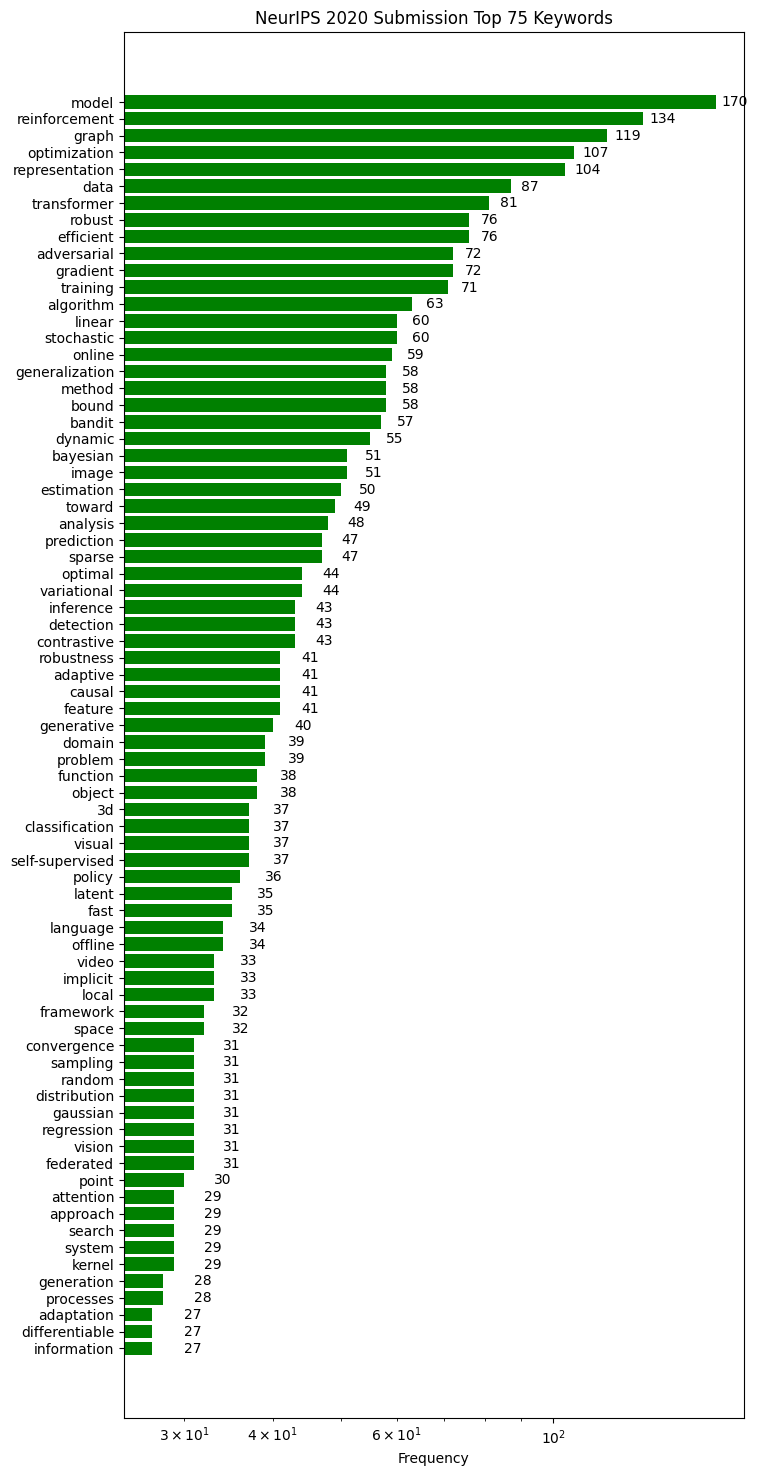

In [16]:
# Show N most common keywords and their frequencies
num_keyowrd = 75 #FIXME
keywords_counter_vis = keyword_counter.most_common(num_keyowrd)

plt.rcdefaults()
fig, ax = plt.subplots(figsize=(8, 18))

key = [k[0] for k in keywords_counter_vis] 
value = [k[1] for k in keywords_counter_vis] 
y_pos = np.arange(len(key))
ax.barh(y_pos, value, align='center', color='green', ecolor='black', log=True)
ax.set_yticks(y_pos)
ax.set_yticklabels(key, rotation=0, fontsize=10)
ax.invert_yaxis() 
for i, v in enumerate(value):
    ax.text(v + 3, i + .25, str(v), color='black', fontsize=10)
ax.set_xlabel('Frequency')
ax.set_title('NeurIPS 2021 Submission Top {} Keywords'.format(num_keyowrd))

plt.show()

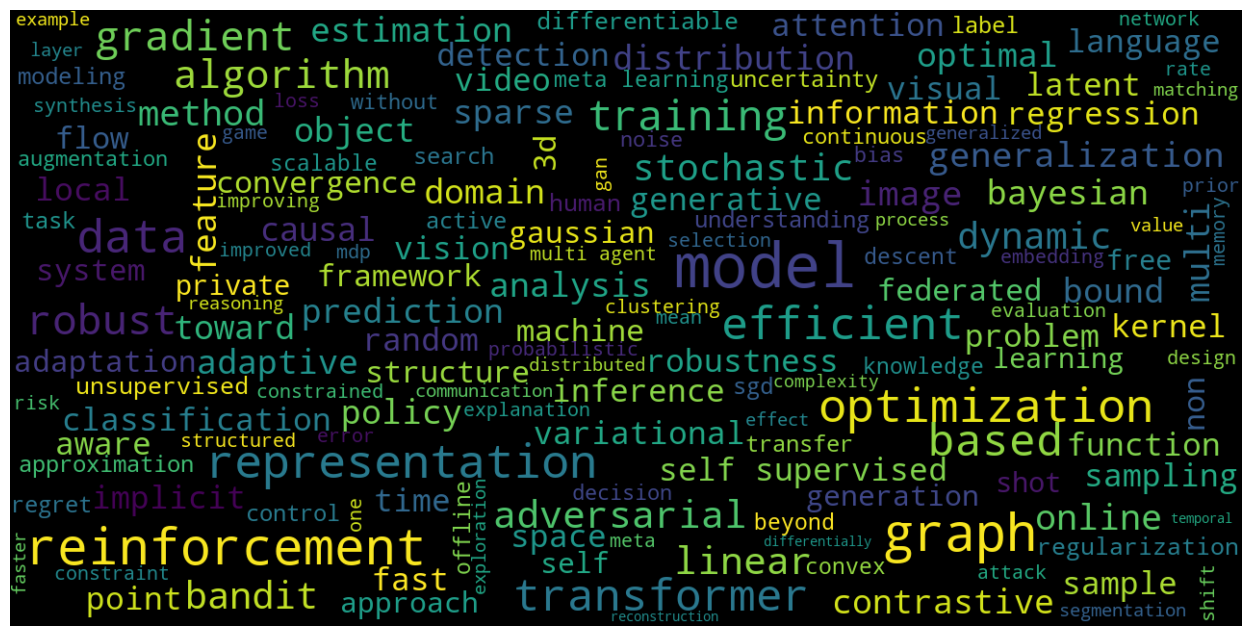

In [17]:
# Show the word cloud forming by keywords
from wordcloud import WordCloud
wordcloud = WordCloud(max_font_size=64, max_words=160, 
                      width=1280, height=640,
                      background_color="black").generate(' '.join(keyword_list))
plt.figure(figsize=(16, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [28]:
nltk.download('punkt')


text = ' '.join(title_list)
tokens = nltk.word_tokenize(text)
bigrams = nltk.bigrams(tokens)
frequency = nltk.FreqDist(bigrams)
for key,value in frequency.items():
    if value > 3:
        print(' '.join(key) + "," + str(value))

with Adversarial,4
Adversarial Robustness,15
Speech Recognition,4
Generalization with,5
Optimal Transport,8
Domain Adaptation,18
Multi-Armed Bandits,6
Bandits with,15
Analysis of,21
in Linear,6
Role of,5
: Neural,8
in the,30
On the,37
the Convergence,4
Theory of,5
Learning From,4
: Adaptive,5
in Stochastic,4
Stochastic Bandits,4
Sampling and,4
and the,7
of Gradient,8
Networks :,13
of Graph,6
Graph Neural,35
Neural Networks,117
Structure Learning,5
learning in,4
MDPs with,5
Robust and,7
Learning via,26
Offline Reinforcement,16
Reinforcement Learning,128
Text Generation,4
for Image,5
Image Classification,5
? A,4
Networks for,16
Dynamical Systems,11
Models and,4
Learning with,69
for Continual,4
Continual Learning,12
: A,75
for the,13
Training of,8
of Deep,11
Deep Neural,12
A Framework,4
Framework for,20
Bayesian Optimization,13
Optimization with,16
Regret Bounds,7
Bounds for,29
, and,27
Few-Shot Learning,7
Adversarially Robust,4
Domain Generalization,7
: The,6
Adversarial Training,8
Contr